#Setup

Install Dependencies

In [1]:
!pip install gymnasium

Import dependencies

In [2]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
import time
import matplotlib.pyplot as plt


#Preperation

Define the Policy Network

In [3]:
class Policy(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

Create the environment, instantiate the policy network and define the optimizer

In [4]:
# Create the environment
env = gym.make('CartPole-v1',render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Initialize the policy network
policy = Policy(state_dim, action_dim)

# Define the optimizer
optimizer = optim.Adam(policy.parameters(), lr=0.01)

#Algorithm

Pick an action based on policy

In [5]:
def select_action(state):
    state = np.array(state)
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = policy(state)
    m = Categorical(probs)
    action = m.sample()
    return action.item(), m.log_prob(action)

Policy Gradiant Algorithm, the actual training loop

In [6]:
def policy_gradient():
    num_episodes = 10000
    gamma = 0.99

    rewards_per_episode = []  # List to store rewards for each episode

    # for 1000 episodes
    for episode in range(num_episodes):
        observations = env.reset()
        state = np.array(observations[0])
        episode_reward = 0
        log_probs = []
        rewards = []

        # loop through each time step in one episode
        while True:
            action, log_prob = select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)

            log_probs.append(log_prob)
            rewards.append(reward)
            episode_reward += reward

            if done or truncated:
                break

            state = next_state


        # Compute the discounted rewards
        discounts = [gamma**i for i in range(len(rewards))]
        discounted_rewards = [discount * reward for discount, reward in zip(discounts, rewards)]
        
        # Convert the discounted_rewards into a Tensor
        discounted_rewards = torch.Tensor(discounted_rewards)

        # Normalize the discounted rewards
        discounted_rewards -= torch.mean(discounted_rewards)
        discounted_rewards /= torch.std(discounted_rewards)

        # Calculate the loss
        policy_loss = []
        for log_prob, reward in zip(log_probs, discounted_rewards):
            policy_loss.append(-log_prob * reward)
        policy_loss = torch.cat(policy_loss).sum()

        # Update the policy network
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        # Print the episode statistics
        if episode % 10 == 0:
            print('Episode {}: reward = {}'.format(episode, episode_reward))
        
        rewards_per_episode.append(episode_reward)    
    
    # Plot the rewards per episode
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    plt.show()

#Run Trials

Episode 0: reward = 27.0
Episode 10: reward = 10.0
Episode 20: reward = 15.0
Episode 30: reward = 31.0
Episode 40: reward = 43.0
Episode 50: reward = 45.0
Episode 60: reward = 17.0
Episode 70: reward = 28.0
Episode 80: reward = 47.0
Episode 90: reward = 44.0
Episode 100: reward = 36.0
Episode 110: reward = 30.0
Episode 120: reward = 36.0
Episode 130: reward = 29.0
Episode 140: reward = 29.0
Episode 150: reward = 18.0
Episode 160: reward = 15.0
Episode 170: reward = 15.0
Episode 180: reward = 18.0
Episode 190: reward = 37.0
Episode 200: reward = 43.0
Episode 210: reward = 51.0
Episode 220: reward = 42.0
Episode 230: reward = 28.0
Episode 240: reward = 45.0
Episode 250: reward = 31.0
Episode 260: reward = 28.0
Episode 270: reward = 37.0
Episode 280: reward = 33.0
Episode 290: reward = 31.0
Episode 300: reward = 26.0
Episode 310: reward = 21.0
Episode 320: reward = 35.0
Episode 330: reward = 20.0
Episode 340: reward = 26.0
Episode 350: reward = 29.0
Episode 360: reward = 22.0
Episode 370:

Episode 2960: reward = 85.0
Episode 2970: reward = 108.0
Episode 2980: reward = 123.0
Episode 2990: reward = 123.0
Episode 3000: reward = 139.0
Episode 3010: reward = 77.0
Episode 3020: reward = 52.0
Episode 3030: reward = 52.0
Episode 3040: reward = 58.0
Episode 3050: reward = 109.0
Episode 3060: reward = 67.0
Episode 3070: reward = 46.0
Episode 3080: reward = 66.0
Episode 3090: reward = 61.0
Episode 3100: reward = 43.0
Episode 3110: reward = 47.0
Episode 3120: reward = 105.0
Episode 3130: reward = 62.0
Episode 3140: reward = 88.0
Episode 3150: reward = 78.0
Episode 3160: reward = 234.0
Episode 3170: reward = 136.0
Episode 3180: reward = 500.0
Episode 3190: reward = 410.0
Episode 3200: reward = 95.0
Episode 3210: reward = 219.0
Episode 3220: reward = 151.0
Episode 3230: reward = 74.0
Episode 3240: reward = 85.0
Episode 3250: reward = 76.0
Episode 3260: reward = 235.0
Episode 3270: reward = 157.0
Episode 3280: reward = 71.0
Episode 3290: reward = 55.0
Episode 3300: reward = 45.0
Episod

Episode 5870: reward = 79.0
Episode 5880: reward = 50.0
Episode 5890: reward = 77.0
Episode 5900: reward = 101.0
Episode 5910: reward = 89.0
Episode 5920: reward = 107.0
Episode 5930: reward = 65.0
Episode 5940: reward = 76.0
Episode 5950: reward = 122.0
Episode 5960: reward = 500.0
Episode 5970: reward = 500.0
Episode 5980: reward = 500.0
Episode 5990: reward = 500.0
Episode 6000: reward = 500.0
Episode 6010: reward = 500.0
Episode 6020: reward = 500.0
Episode 6030: reward = 500.0
Episode 6040: reward = 500.0
Episode 6050: reward = 500.0
Episode 6060: reward = 500.0
Episode 6070: reward = 500.0
Episode 6080: reward = 500.0
Episode 6090: reward = 500.0
Episode 6100: reward = 500.0
Episode 6110: reward = 500.0
Episode 6120: reward = 495.0
Episode 6130: reward = 500.0
Episode 6140: reward = 500.0
Episode 6150: reward = 500.0
Episode 6160: reward = 500.0
Episode 6170: reward = 500.0
Episode 6180: reward = 500.0
Episode 6190: reward = 500.0
Episode 6200: reward = 500.0
Episode 6210: reward

Episode 8700: reward = 500.0
Episode 8710: reward = 500.0
Episode 8720: reward = 345.0
Episode 8730: reward = 500.0
Episode 8740: reward = 351.0
Episode 8750: reward = 444.0
Episode 8760: reward = 365.0
Episode 8770: reward = 374.0
Episode 8780: reward = 264.0
Episode 8790: reward = 271.0
Episode 8800: reward = 269.0
Episode 8810: reward = 267.0
Episode 8820: reward = 394.0
Episode 8830: reward = 352.0
Episode 8840: reward = 379.0
Episode 8850: reward = 366.0
Episode 8860: reward = 264.0
Episode 8870: reward = 343.0
Episode 8880: reward = 376.0
Episode 8890: reward = 373.0
Episode 8900: reward = 440.0
Episode 8910: reward = 493.0
Episode 8920: reward = 362.0
Episode 8930: reward = 366.0
Episode 8940: reward = 394.0
Episode 8950: reward = 367.0
Episode 8960: reward = 500.0
Episode 8970: reward = 444.0
Episode 8980: reward = 500.0
Episode 8990: reward = 372.0
Episode 9000: reward = 370.0
Episode 9010: reward = 353.0
Episode 9020: reward = 342.0
Episode 9030: reward = 347.0
Episode 9040: 

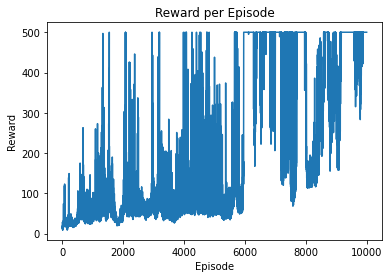

In [7]:
policy_gradient()